<a href="https://colab.research.google.com/github/shashwat9kumar/Pix2Pix_GANS_Map_to_Cityscape/blob/master/Pix2Pix_Gan_Maps_using_in_realtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## https://www.google.com/maps/@26.9128154,80.9508479,1536m/data=!3m1!1e3

In [57]:
image_path= "/content/drive/MyDrive/SavedModels/home_4.jpg"

In [58]:
prediction_image = tf.io.read_file(image_path)
prediction_image = tf.image.decode_image(prediction_image, channels=3)
prediction_image = tf.image.resize(prediction_image, (256, 256))
prediction_image = tf.expand_dims(prediction_image, axis=0)
prediction_image = tf.cast(prediction_image, dtype=tf.float32)
prediction_image = (prediction_image / 127.5) -1
prediction_image.shape

TensorShape([1, 256, 256, 3])

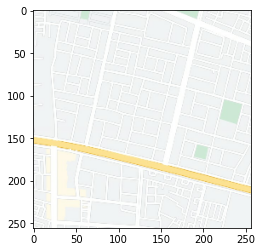

In [59]:
plt.imshow(tf.squeeze(prediction_image, axis=0)*0.5 +0.5)

In [60]:
generator = tf.keras.models.load_model("/content/drive/MyDrive/SavedModels/Generator")

In [61]:
generated_image = generator.predict(prediction_image)

In [62]:
generated_image = tf.cast(generated_image, dtype = tf.float32)

In [63]:
generated_image = tf.squeeze(generated_image, axis=0)

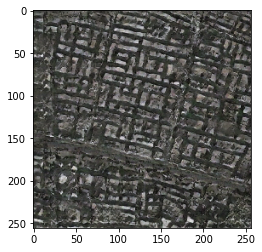

In [64]:
plt.imshow((generated_image+1)/2.0);

In [65]:
generated_image = (generated_image+1)/2.0

In [66]:
generated_image = tf.image.resize(generated_image, (1080, 1080))

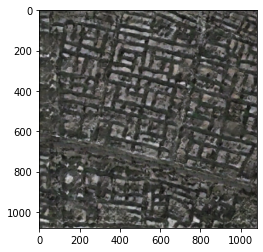

In [67]:
plt.imshow(generated_image)

In [68]:
plt.imsave("generated_image.png", generated_image.numpy())

In [74]:
image_path_orig = "/content/drive/MyDrive/SavedModels/home_4_original_.jpg"

In [75]:
orig_image = tf.io.read_file(image_path_orig)
orig_image = tf.image.decode_image(orig_image, channels=3)
orig_image = tf.image.resize(orig_image, (256, 256))
orig_image = (orig_image / 127.5) -1

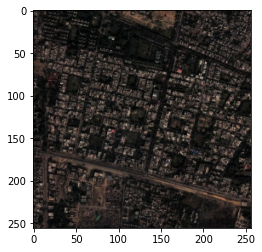

In [76]:
plt.imshow((orig_image+1)/2.0)